<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-действий:" data-toc-modified-id="План-действий:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План действий:</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## План действий:
1. Ознакомиться с файлом, изучить его
2. Подготовить данные и проведение необходимых расчетов
3. Провести анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Сделать общий вывод и ответить на поставленные вопросы

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm 
import matplotlib.pyplot as plt
from scipy import stats as st


#общая информация о данных
df.info()
# размер данных
print(df.shape)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
(16715, 11)
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2

Таблица представляет собой сведения об играх, всего в таблице 16715 строк и 11 столбцов.

Присутствуют пропущенные значения в некоторых столбцах, возможно есть дубликаты. Также необходимо заменить названия столбцов на удобные (приведем все буквы к нижнему регистру). Заменим тип данных в столбцах year_of_release, critic_score, user_score.


In [2]:
# Выведем основные характеристики таблицы
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


По данным характеристикам, больше всего продавалось копий в Северной Америке, затем в Европе, и потом в Японии. Средняя оценка за все игры 69 баллов.

### Вывод
Таблицы возможно имеют дубликаты, нужно будет это проверить. Также нужно привести данные к стандартному виду (заменить их тип). И нужно решить на что заменить пропущенные значения в столбцах. 

## Предобработка данных

Найдем количество дубликатов таблице.

In [3]:
print(df.duplicated().sum())

0


Как видим, дубликатов в таблице нет. Поработаем с названием столбцов в таблице, приведем все буквы в них к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Таким образом, привел названия столбцов к удобному для работы виду. Разберемся с пропущенными значениями в столбцах name, year_of_release, genre, critic_score, user_score, rating. 

In [5]:
df[df['year_of_release'].isnull() & df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Как можно заметить у данных игр нет года выхода и нет оценки от критиков или пользователей. Также можно заметить, что данные игры почти не покупали, полученные результы могут означать предзаказы игр, но так как оценки пользователей или критиков нет, также не был поставлен рейтинг, скорее всего данные игры так и не были выпущены. Поэтому можно удалить эти данные, так как они не повлияют на дальнейший результат, наоборот они могут исказить данные.

In [7]:
# Удаляем пустые значения для игр, которые не были выпущены
df.drop(df[df['year_of_release'].isnull() & df['critic_score'].isnull()].index, inplace = True)

In [8]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M


Отсавим эти значения пропущенными, так как неизвестно в какой именно год были выпущены эти игры. Удалим пропущенные значения в столбце critic_score, но с учетом того, что продаж у данных игр почти не было, это также скорее всего значит, что данные игры не были выпущены, поэтому не могли быть оценены критиками или пользователями.

In [9]:
df.query('na_sales <= 0.1 & critic_score.isnull() & jp_sales <= 0.1 & eu_sales <= 0.1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2472,Ben 10: Protector of Earth,PS2,2007.0,Action,0.09,0.00,0.00,0.74,NaN,7.6,E10+
3115,SingStar R&B,PS2,2007.0,Misc,0.00,0.05,0.00,0.60,NaN,NaN,NaN
3275,SingStar Singalong With Disney,PS2,2008.0,Misc,0.00,0.04,0.00,0.57,NaN,NaN,NaN
3681,SingStar Summer Party,PS2,2008.0,Misc,0.00,0.06,0.00,0.48,NaN,NaN,NaN
4343,SingStar Take That,PS2,2009.0,Misc,0.00,0.06,0.00,0.39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Остальные данны в столбцах critic_score, users_score, years_of_release будет заменять некорректно, так как можно потерять важные данные и заменять их на среднее значение или медиану пока неуместно.

In [11]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


**tbd(to be done)** - это абривеатура, обозначающая то, что пользователь еще не определился с оценкой, поэтому можно заменить данные значения на пропущенные, чтобы не потерять эти данные и не удалять их.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16600, dtype: object

Заменим тип данных в столбцах year_of_release на int64, user_score на float64

In [13]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16600 entries, 0 to 16714
Data columns (total 11 columns):
name               16598 non-null object
platform           16600 non-null object
year_of_release    16446 non-null Int64
genre              16598 non-null object
na_sales           16600 non-null float64
eu_sales           16600 non-null float64
jp_sales           16600 non-null float64
other_sales        16600 non-null float64
critic_score       8137 non-null float64
user_score         7586 non-null float64
rating             9920 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             200

Посчитаем суммарные продажи для каждой игры по всем регионам. Данные сохраним в отдельный столбец total_sales

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

Таким образом была проведена предобработка данных. 

- Был заменен тип данных на нужный в столбцах user_score и year_of_release
- Заменены значения tbd в столбце user_score на пропущенные, так как человек еще не определился с оценкой
- Были удалены строки с пропущенными значениями, у которых продажи были меньше 100000 и, у которых не было оценок критиков или пользователей, а также не было года выпуска игры, так как скорее всего эти игры так и не были выпущены и для дальнейшего агализа данных они не нужны
- Оставшиеся пропущенные значения для столбца year_of_release могут означать, что производитель еще не уверен на счет точного года выпуска игры или же игра была выпущена одновременно с другой игрой и год не указали. В столбце name и genre есть одно пропущенное значения, скорее всего производитель не придумал название для игры и ее жанр. Пропущенные значения в столбцах critic_score, user_score, rating могут обозначать то, что критики, пользователи еще не оценили игру, не поставили ей свою оценку, а комиссия по присвоению рейтинг также еще не определилась какой рейтинг поставить игре.
- Были посчитаны суммарные продажи для каждой игры по всем регионам.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

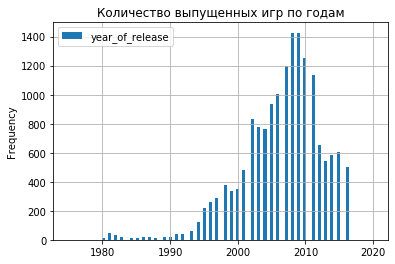

In [15]:
df.plot(y = 'year_of_release', kind = 'hist', bins = 100, grid = True, range = (1975,  2020), title = 'Количество выпущенных игр по годам')
df['year_of_release'].value_counts()

Таким образом на данном графике можно увидеть, что продажи игр начали расти в 90-х годах и продолжались до 2008 года, а потом начали падать, но не ниже 200 игр в год. Поэтому можно сказать, что данные до 2000 года можно отбросить, они не важны. 

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

          total_sales
platform             
PS2           1250.43
X360           971.11
PS3            939.10
Wii            905.19
DS             804.87
PS             729.27
GBA            316.46
PS4            314.14
PSP            292.18
PC             259.47
3DS            258.28
XB             257.68
GB             254.43
NES            251.05
N64            218.01
SNES           200.04
GC             198.40
XOne           159.32
2600            86.48
WiiU            82.19
PSV             54.07
SAT             33.59
GEN             30.77
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


Text(0, 0.5, 'Количество продаж')

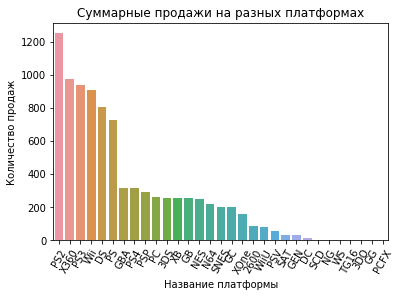

In [16]:
high_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
print(high_sales)
s = sns.barplot(x=high_sales.index,y=high_sales['total_sales'])
s.set_xticklabels(labels = high_sales.index, rotation=60)
plt.title("Суммарные продажи на разных платформах")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")


Таким образом платформами с самыми высокими продажами являются: PS2, X360, PS3, Wii, DS, PS. Построим для них распределение по годам. 

Text(0, 0.5, 'Количество продаж')

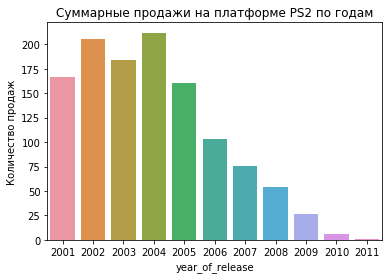

In [17]:
ps_2 = df.query('platform == "PS2" & year_of_release > 2000').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
sns.barplot(x=ps_2.index,y=ps_2['total_sales'])
plt.title("Суммарные продажи на платформе PS2 по годам")
plt.ylabel("Количество продаж")
    

Пик для компании PS2 пришелся на 2004 год, после этого количество продаж уменьшалось. Падение произошло за 6 лет.

Text(0, 0.5, 'Количество продаж')

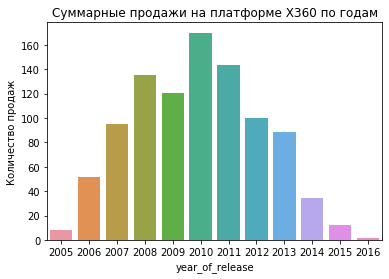

In [18]:
x_360= df.query('platform == "X360" & year_of_release > 2000').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
sns.barplot(x=x_360.index,y=x_360['total_sales'])
plt.title("Суммарные продажи на платформе X360 по годам")
plt.ylabel("Количество продаж")

Пик для компании X360 пришелся на 2010 год, после этого количество продаж уменьшалось, падение произошло за 6 лет.

Text(0, 0.5, 'Количество продаж')

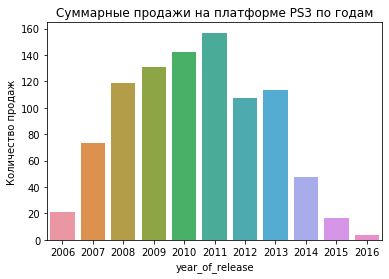

In [19]:
ps_3= df.query('platform == "PS3" & year_of_release > 2000').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
sns.barplot(x=ps_3.index,y=ps_3['total_sales'])
plt.title("Суммарные продажи на платформе PS3 по годам")
plt.ylabel("Количество продаж")

Пик для компании X360 пришелся на 2011 год, после этого количество продаж уменьшалось, падение произошло за 5 лет.

Text(0, 0.5, 'Количество продаж')

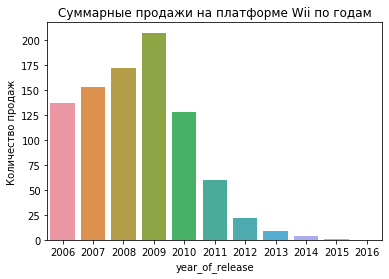

In [20]:
wii = df.query('platform == "Wii" & year_of_release > 2000').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
sns.barplot(x=wii.index,y=wii['total_sales'])
plt.title("Суммарные продажи на платформе Wii по годам")
plt.ylabel("Количество продаж")

Пик для компании Wii пришелся на 2009 год, после этого количество продаж уменьшалось, падение произошло за 6 лет.

Text(0, 0.5, 'Количество продаж')

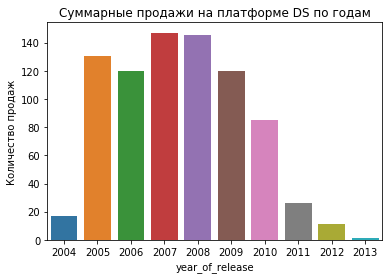

In [21]:
ds = df.query('platform == "DS" & year_of_release > 2000').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
sns.barplot(x=ds.index,y=ds['total_sales'])
plt.title("Суммарные продажи на платформе DS по годам")
plt.ylabel("Количество продаж")

Пик для компании Wii пришелся на 2007- 2008 год, после этого количество продаж уменьшалось, падение произошло за 5 лет.

Text(0, 0.5, 'Количество продаж')

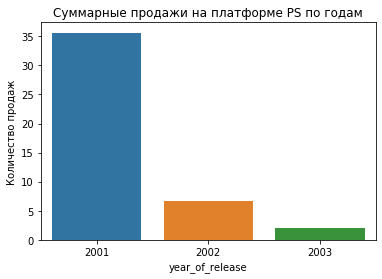

In [22]:
ps = df.query('platform == "PS" & year_of_release > 2000').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
sns.barplot(x=ps.index,y=ps['total_sales'])
plt.title("Суммарные продажи на платформе PS по годам")
plt.ylabel("Количество продаж")

Пик для компании PS пришелся на 2001 год, после этого количество продаж уменьшалось, падение произошло за 2 года.

**Таким образом можно сделать вывод, что подъем у самых продаваемых компаний в среднем происходит за 4-5 лет, а падение занимает 5-6 лет. Самый быстрой подъем был у компании WII, но также их ожидало и быстрое падение. Самый продаваемые игры на платформах PS2 и X360. Средний жизненный цикл у платформ составляет 10-12 лет**

**Актуальным периодом выберем те продажи и выпуски игр, которые были после 2014 года, так как мы прогнозируем на 2017 год и нужна свежая информация по продажам.**

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22
WiiU            42.98
PC              27.05
PSV             22.40
Wii              5.07
PSP              0.36


Text(0, 0.5, 'Количество продаж')

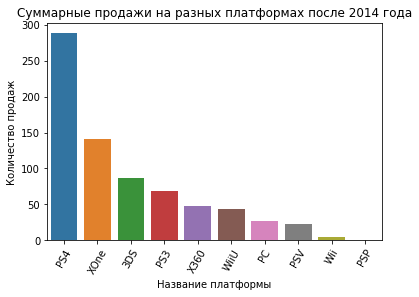

In [23]:
new_high_sales = df.query('year_of_release >= 2014').pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
print(new_high_sales)
s = sns.barplot(x=new_high_sales.index,y=new_high_sales['total_sales'])
s.set_xticklabels(labels = new_high_sales.index, rotation=60)
plt.title("Суммарные продажи на разных платформах после 2014 года")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

**На этом графике видно, что платформы PS4, XOne, 3DS, WiiU подняли свои продажи по сравнению с прошлыми периодами. Потенциально прибыльными можно считать платформы: PS4, XOne, 3DS, WiiU и PS3** 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат

(-0.1, 1)

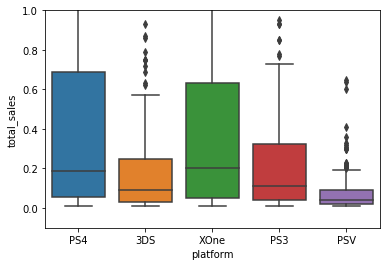

In [24]:
df_2014 = df.query('year_of_release >= 2014')
top_platforms = df_2014['platform'].value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="total_sales", x="platform", data=df_2014[df_2014['platform'].isin(top_platforms)])
plt.ylim(-0.1, 1)

**Как можно заметить продажи на каждой платформе по медиане по годам разные: больше всего продавала платформа XOne, рядом находится PS4, затем 3DS и PS3, меньше всего PSV. Хотя по сумме больше продают платформа PS4, по медиане немного больше продает платформа XOne** 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

0.40266141068104083


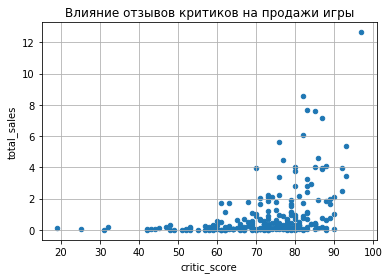

In [25]:
ps_4_platform = df.query('platform == "PS4" & year_of_release >= 2014')
ps_4_platform.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, title = 'Влияние отзывов критиков на продажи игры')
print(ps_4_platform['critic_score'].corr(ps_4_platform['total_sales']))

Как можно заметить, отзывы критиков влияют на продажи игры. Чем лучше отзывы, тем больше покупают игр, что логично, люди доверяют оценкам экспертов.

-0.040131589472697356


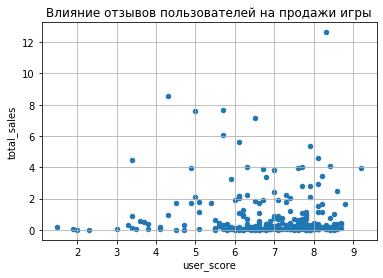

In [26]:
ps_4_platform.plot(x='user_score', y='total_sales', kind='scatter', grid=True, title = 'Влияние отзывов пользователей на продажи игры')
print(ps_4_platform['user_score'].corr(ps_4_platform['total_sales']))

Как можно заметить, отзывы пользователей не влияют на продажи игры.

0.42867694370333226
-0.0703839280647581


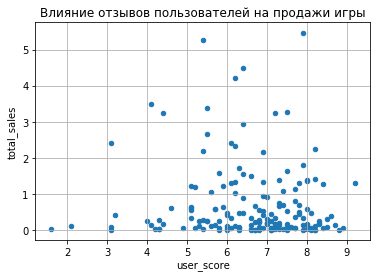

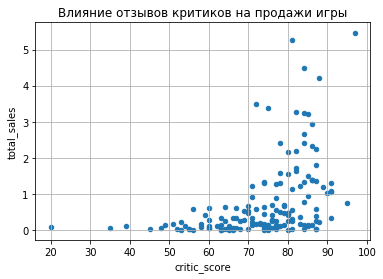

In [27]:
def scatter_plot(name_of_platform):
    platform = df_2014[df_2014['platform'] == name_of_platform]
    platform.plot(x='user_score', y='total_sales', kind='scatter', grid=True, title = 'Влияние отзывов пользователей на продажи игры')
    platform.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, title = 'Влияние отзывов критиков на продажи игры')
    print(platform['critic_score'].corr(platform['total_sales']))
    print(platform['user_score'].corr(platform['total_sales']))
    
scatter_plot('XOne')


Как можно заметить, отзывы критиков влияют на продажи игры для платформы XOne. Чем лучше отзывы, тем больше покупают игр, что логично, люди доверяют оценкам экспертов.
Отзывы пользователей не влияют на продажи игры.

0.314117492869051
0.2151932718527028


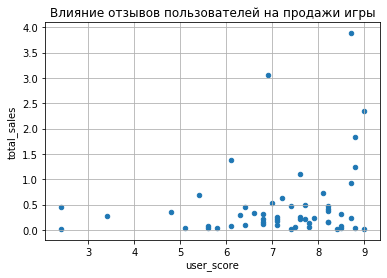

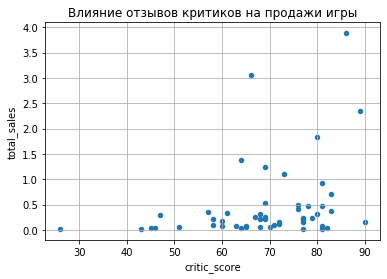

In [28]:
scatter_plot('3DS')


Как можно заметить, отзывы критиков влияют на продажи игры для платформы 3DS. Чем лучше отзывы, тем больше покупают игр, что логично, люди доверяют оценкам экспертов. 
Также отзывы пользователей влияют на продажи игры, но незначительно и меньше чем отзывы критиков. Чем лучше отзывы пользователей, тем больше покупают игр.

0.370201412480884
0.40792645792170773


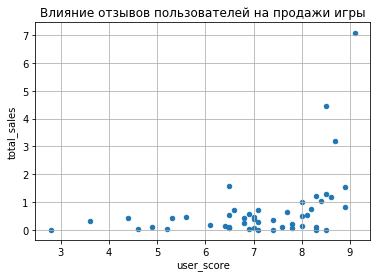

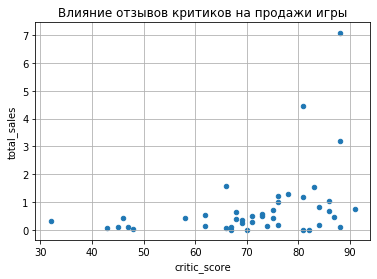

In [29]:
scatter_plot('WiiU')


Как можно заметить, отзывы критиков влияют на продажи игры для платформы WiiU. Тенденция сохраняется, чем лучше отзывы, тем больше покупают игр. 

Отзывы пользователей влияют на продажи игры, даже больше, чем отзывы критиков. Чем лучше отзывы пользователей, тем больше покупают игр.

0.44657460493190704
-0.16676141347662118


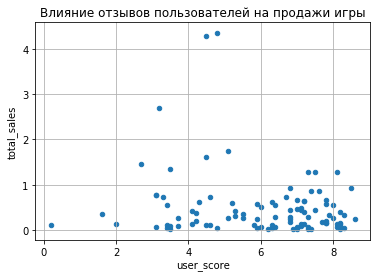

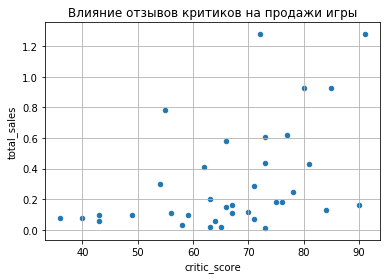

In [30]:
scatter_plot('PS3')

Как можно заметить, отзывы критиков влияют на продажи игры для платформы PS3. Тенденция сохраняется, чем лучше отзывы, тем больше покупают игр.

Отзывы пользователей влияют на продажи игры, но незначительно и гораздо меньше чем отзывы критиков. Чем лучше отзывы пользователей, тем больше покупают игр.

**Таким образом, можно сказать, что отзывы критиков влияют на продажи игр больше, чем отзывы пользовтелей. Люди больше доверяют критикам, чем обычным пользователям и особенно это выражается для платформ PS4, PS3, XOne. Однако бывают случаи когда отзывы критиков и отзывы пользователей одинаково влияют на продажи игр, как например для компаний 3DS, WiiU - возможно это Японские компании и для них отзывы пользователей также высоко ценятся**

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

              total_sales
genre                    
Action             199.36
Shooter            170.94
Sports             109.48
Role-Playing       101.44
Misc                37.55
Fighting            28.22
Racing              27.52
Platform            18.09
Adventure           17.55
Simulation          13.13
Strategy             3.96
Puzzle               2.21


Text(0, 0.5, 'Количество продаж')

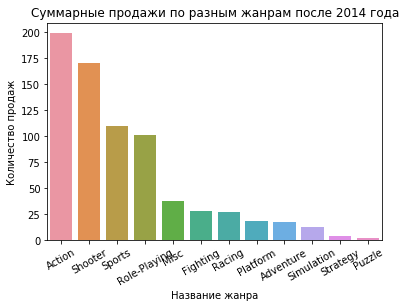

In [31]:
genre_sales = df_2014.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
print(genre_sales)
g = sns.barplot(x=genre_sales.index,y=genre_sales['total_sales'])
g.set_xticklabels(labels = genre_sales.index, rotation=30)
plt.title("Суммарные продажи по разным жанрам после 2014 года")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

Как можно заметить игры Shooter, Action, Sports продаются лучше всего. Это динамичные, инетересные игры, с хорошим и легким сюжетом, также они больше соревновательные, в основном у них удобный интерфейс и управление может быть от 1 лица, что интереснее пользователю, в отличие от стратегий или пазлов, которые бывают только от 3 лица, и они сложнее по прохождению и с обычным сюжетом, поэтому и продаются они хуже. 

(-0.1, 2)

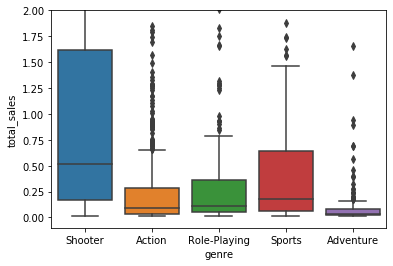

In [32]:
# Построим boxplot для топ-5 жанров
top_platforms = df_2014['genre'].value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="total_sales", x="genre", data=df_2014[df_2014['genre'].isin(top_platforms)])
plt.ylim(-0.1, 2)

Как можно заметить продажи на каждому жанру по медиане разные: больше всего продается жанр Shooter, гораздо ниже находятся Sports, Role_playing, затем Action и Adventure. Хотя по сумме больше продается игр с жанров Action, а не Sports или Role_playing, значит игр Action просто больше, а больше продаж в расчете на единицу имуют жанры Sports и Role_playing.

**Таким образом был проведен исследовательский анализ данных, а именно были сделаны следующие выводы:**
- Больше всего игр выпускалось с 1995 года по 2008 год - произошел рост, после чего произошло падение выпуска игр, возможно появились более востребованные игры и платформы;
- При появлении платформы она выходила на пик за 4-5 лет и достигала максимум продаж, а потом за 5-6 лет продажи падали и компания переставала выпускать игры (вывод сделан на основе 5 самых популрных платформ). В среднем платформа существовала 10-12 лет;
- Потенциально прибыльными платформами являются: PS4, PS3, XOne, 3DS, WiiU;
- Были построены графики boxplot. Больше всего игр по медиане продает платформа XOne, в расчете на единицу, хотя больше всего продаж у PS4.
- Была вычислена зависимсоть влияния отзывов критиков и пользователей на продажи. Отзывы критиков влияют на продажи сильнее, чем отзывы покупателей для всех основных популярных платформ. Но иногда встречаются платформы, где отзывы пользователей также влияют на продажи игр.
- Самыми прибыльными жанрами являются жанры Action, Sports, Shooter - больше 60 млн. продаж, т.к. они динамичнее и интереснее по геймплею, а самыми малоприбыльными являются Puzzle, Strategy - 5 млн. продаж.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Выявим топ-5 платформ для каждого региона по продажам

          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05
WiiU         19.36
PC            7.23
PSV           2.52
Wii           2.08
PSP           0.00


Text(0, 0.5, 'Количество продаж')

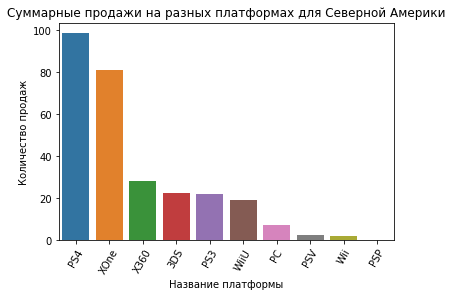

In [33]:
# Строим график для региона- Северная Америка
na_sales = df_2014.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
print(na_sales)
s = sns.barplot(x=na_sales.index,y=na_sales['na_sales'])
s.set_xticklabels(labels = na_sales.index, rotation=60)
plt.title("Суммарные продажи на разных платформах для Северной Америки")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12
X360         15.49
WiiU         13.15
PSV           3.53
Wii           2.59
PSP           0.00


Text(0, 0.5, 'Количество продаж')

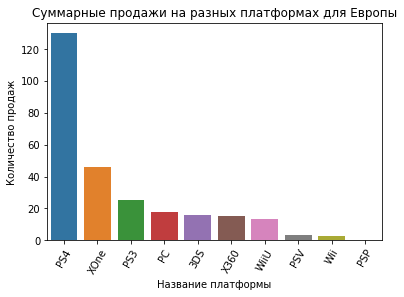

In [34]:
# Строим график для региона-Европа
eu_sales = df_2014.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
print(eu_sales)
s = sns.barplot(x=eu_sales.index,y=eu_sales['eu_sales'])
s.set_xticklabels(labels = eu_sales.index, rotation=60)
plt.title("Суммарные продажи на разных платформах для Европы")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31
PSP           0.36
XOne          0.32
X360          0.08
PC            0.00
Wii           0.00


Text(0, 0.5, 'Количество продаж')

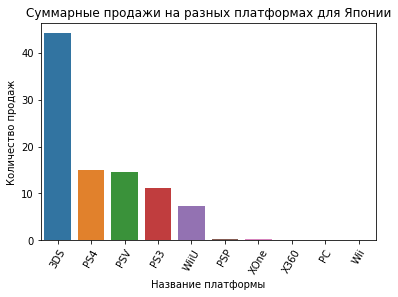

In [35]:
# Строим график для региона- Япония
jp_sales = df_2014.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
print(jp_sales)
s = sns.barplot(x=jp_sales.index,y=jp_sales['jp_sales'])
s.set_xticklabels(labels = jp_sales.index, rotation=60)
plt.title("Суммарные продажи на разных платформах для Японии")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

In [36]:
print(na_sales.head(5).mean())
print(eu_sales.head(5).mean())
jp_sales.head(5).mean()


na_sales    50.574
dtype: float64
eu_sales    47.184
dtype: float64


jp_sales    18.466
dtype: float64

Таким образом, мы видим, что для каждого региона будет свой топ-5 платформ по продажам:
- для Северной Америки: PS4, XOne, 3DS, PS3, X360
- для Европы: PS4, XOne, PC, 3DS, PS3 - больше предпочтений в Европе отдают платформе PlayStation (покупают 3 и 4), также предпочитают PC.
- для Японии: 3DS, PS4, PSV, PS3, WiiU -вместо ХBox в Японии больше поддерживают своих производителей 3DS, WiiU

Во всех регионах популярностью пользуются платформы PS4 и 3DS, что может сказать об их потенциальной прибыльности.

Также в среднем в Северной Америке для 5 топовых платформ идет больше продаж, чем в Европе. В Японии самое малое количество продаж в среднем для 5 топовых платформ. Таким образом можжно сказать, что лучше всего игры продаются в Америке, там находится целевая аудитория

**Выясним самые популярные жанры (топ-5) для каждого региона. Поясним разницу.**

              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05
Fighting         12.43
Racing            8.74
Platform          6.79
Adventure         5.64
Simulation        2.63
Strategy          0.98
Puzzle            0.65


Text(0, 0.5, 'Количество продаж')

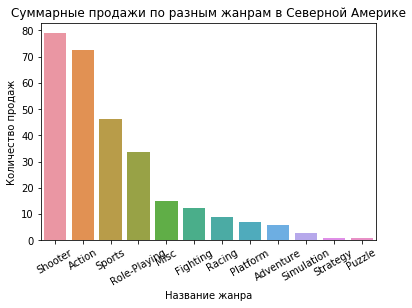

In [37]:
# Топ продаж по жанрам в Северной Америке
genre_sales_region = df_2014.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
print(genre_sales_region)
g = sns.barplot(x=genre_sales_region.index,y=genre_sales_region['na_sales'])
g.set_xticklabels(labels = genre_sales_region.index, rotation=30)
plt.title("Суммарные продажи по разным жанрам в Северной Америке")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13
Misc             12.86
Simulation        7.30
Platform          6.80
Fighting          6.69
Adventure         6.49
Strategy          1.79
Puzzle            0.52


Text(0, 0.5, 'Количество продаж')

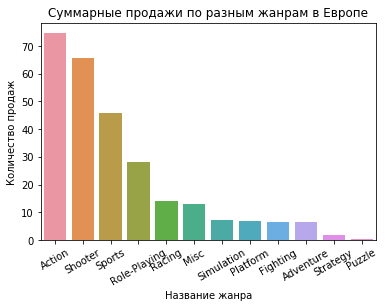

In [38]:
# Топ продаж по жанрам в Европе
genre_sales_region = df_2014.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
print(genre_sales_region)
g = sns.barplot(x=genre_sales_region.index,y=genre_sales_region['eu_sales'])
g.set_xticklabels(labels = genre_sales_region.index, rotation=30)
plt.title("Суммарные продажи по разным жанрам в Европе")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87
Adventure         3.60
Sports            3.26
Platform          2.69
Simulation        2.31
Racing            1.76
Strategy          0.95
Puzzle            0.93


Text(0, 0.5, 'Количество продаж')

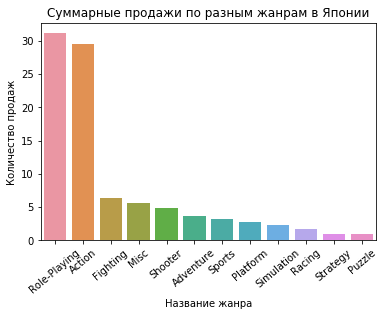

In [39]:
# Топ продаж по жанрам в Японии
genre_sales_region = df_2014.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
print(genre_sales_region)
g = sns.barplot(x=genre_sales_region.index,y=genre_sales_region['jp_sales'])
g.set_xticklabels(labels = genre_sales_region.index, rotation=40)
plt.title("Суммарные продажи по разным жанрам в Японии")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

Таким образом, мы видим, что для каждого региона будет свой топ-5 жанров по продажам:

- для Северной Америки популярными жанрами являются: Action, Sports, Shooter, Role-Playing, Misc   
- для Европы популярные жанры почти такие же как и в Америке: Action, Sports, Shooter, Racing, Role-Playing - вместо аркадных игр в Европе больше любят гонки
- для Японии популярными жанрами являются: Role-Playing, Action, Shooter, Fighting, Misc - особое место занимает игры, в которых нужно исполнять какую-то роль, скорее всего это связано с менталитетом страны, с их предпочтениями.

Во всех регионах популярностью пользуются жанры игр, типа Action, Shooter - то есть игры в которых есть много экшена, либо которые имеют элемент соревнования - спорт или аркада. Разработчикам стоит это учесть при разработке следующих игр, а также учесть потенциальный регион, где лучше продавать игру.



**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [40]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Проверим пропущенные значения в столбце рейтинга игр, чтобы не упустить важную информацию.

In [41]:
df_2014[df_2014['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


513 игр были выпущены без рейтинга или оценки от критиков, но при этом они имели продажи, поэтому заменим пропущенные значения на рейтинг RP - еще не поставленный рейтинг.

In [42]:
df_2014['rating'] = df_2014['rating'].replace(df_2014[df_2014['rating'].isnull()]['rating'], "RP")


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Таким образом пропущенные значения были заменены на рейтинг RP.

In [43]:
df_2014

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


        na_sales
rating          
M          96.42
RP         64.72
E          50.74
T          38.95
E10+       33.23


Text(0, 0.5, 'Количество продаж')

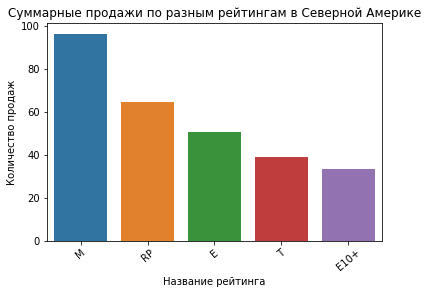

In [44]:
# Продажи по рейтингу в Северной Америке
rating_sales_region = df_2014.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
print(rating_sales_region)
g = sns.barplot(x=rating_sales_region.index,y=rating_sales_region['na_sales'])
g.set_xticklabels(labels = rating_sales_region.index, rotation=40)
plt.title("Суммарные продажи по разным рейтингам в Северной Америке")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

        eu_sales
rating          
M          93.44
RP         58.95
E          58.06
T          34.07
E10+       26.16


Text(0, 0.5, 'Количество продаж')

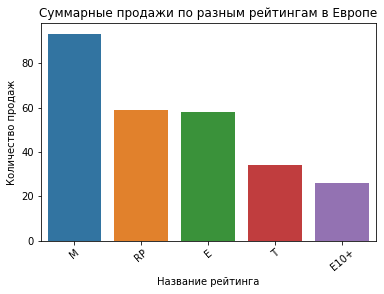

In [45]:
# Продажи по рейтингу в Европе
rating_sales_region = df_2014.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
print(rating_sales_region)
g = sns.barplot(x=rating_sales_region.index,y=rating_sales_region['eu_sales'])
g.set_xticklabels(labels = rating_sales_region.index, rotation=40)
plt.title("Суммарные продажи по разным рейтингам в Европе")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

        jp_sales
rating          
RP         56.90
T          14.78
E           8.94
M           8.01
E10+        4.46


Text(0, 0.5, 'Количество продаж')

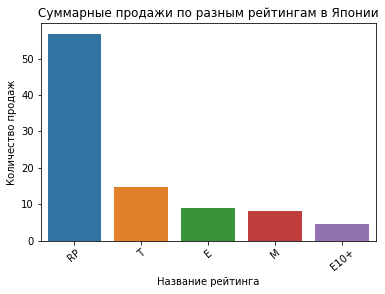

In [46]:
# Продажи по рейтингу в Японии
rating_sales_region = df_2014.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
print(rating_sales_region)
g = sns.barplot(x=rating_sales_region.index,y=rating_sales_region['jp_sales'])
g.set_xticklabels(labels = rating_sales_region.index, rotation=40)
plt.title("Суммарные продажи по разным рейтингам в Японии")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

Таким образом, мы видим, что для каждого региона продажи в зависимсоти от рейтинга особо не отличаются: 

- больше всего продаются игры с рейтингами: E10+, T, M, E, т.е. игры для детей старше 10, для подростков и для зрелых людей (M), старше 17. Данные игры почти не содержат насилия, кроме рейтинга M и T, но даже тут в умеренных количествах. В Северной Америке и в Европе игры с рейтингом T и M продаются одинаково, однако для Японии для подростков продается больше игр.
- Игры с рейтингом RP - это игры, которым еще не поставили рейтинг. Однако для Северной Америки и для Европы продажи по этим играм находятся на втором месте, а для Японии на первом месте. Возможно люди уже знают про эти игры, или это вторая часть популярной игры и люди покупают эти игры, несмотря на то, что рейтинг официально еще не поставили. Возможно данные игры покупают, чтобы успеть поиграть до того, как поставят рейтинг и уже нельзя будет ее купить определенной категории людей.




        na_sales
rating          
M          96.42
RP         64.72
E          50.74
T          38.95
E10+       33.23


Text(0, 0.5, 'Количество продаж')

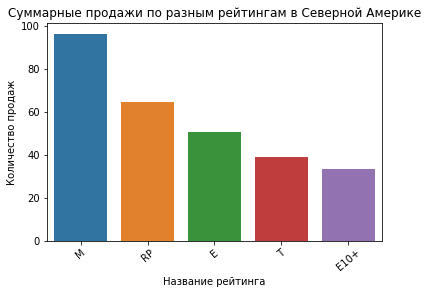

In [47]:
# Продажи по рейтингу в Северной Америке
df_am_eu_2014 = df_2014.drop(['jp_sales'], axis = 1)
rating_sales_region = df_2014.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
print(rating_sales_region)
g = sns.barplot(x=rating_sales_region.index,y=rating_sales_region['na_sales'])
g.set_xticklabels(labels = rating_sales_region.index, rotation=40)
plt.title("Суммарные продажи по разным рейтингам в Северной Америке")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

**Таким образом был составлен портрет для пользовтеля каждого региона, а именно:**
- были выявлены самые популярные платформы в каждом регионе и сделан вывод, что для всех регионов популярными платформами являются PS4 и 3DS, также в Японии больше поддерживают платформы своего производства
- были выявлены самые популярные жанры в каждом регионе: Action, Sports и Shooter - эти жанры присутствуют в топе для всех регионов, что может говорить о том, что данные игры потенциально прибыльны
- была выявлена зависимость продаж от рейтинга игры:  в Европе и Америке чаще покупают игры с рейтингом M, хуже всего покупают игры для детей до 10 лет с рейтингом E10+. Также часто покупают игры, у которых еще нет официального рейтинга.

В целом для Европы и Северной Америки топовые платформы, жанры игр похожи, а для Японии отличаются, поэтому нужно учитывать в каком регионе производятся продажи и какую прибыль следует ожидать.

## Проверка гипотез

**Проверим гипотезу о том, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

В качестве H0 примем тот вариант, что средние рейтинги у данных платформ не различаются, исследуемые параметры равны, а в качестве альтернативной гипотезы скажем, что различия есть. В качестве критерия проверки гипотез выберем 95% доверительный интервал, т.е.альфа или уровень статистической значимости = 0.05. Т.е. из 500 измерений мы позволяем себе ошибиться в отвергнутой или выбранной гипотезе 25 раз.

In [48]:
# Составим датасет для проверки гипотез для двух платформ
xone = df.query('platform == "XOne" & year_of_release >= 2014').dropna()
print(xone)
pc = df.query('platform == "PC" & year_of_release >= 2014').dropna()
print(pc)

                                 name platform  year_of_release         genre  \
165                Grand Theft Auto V     XOne             2014        Action   
179    Call of Duty: Advanced Warfare     XOne             2014       Shooter   
242                 Halo 5: Guardians     XOne             2015       Shooter   
270                         Fallout 4     XOne             2015  Role-Playing   
373           Assassin's Creed: Unity     XOne             2014        Action   
...                               ...      ...              ...           ...   
16264                      Worms: WMD     XOne             2016        Action   
16314     Prototype: Biohazard Bundle     XOne             2016        Action   
16392                  Goat Simulator     XOne             2016    Simulation   
16597     Saints Row: Gat out of Hell     XOne             2015        Action   
16630        Sébastien Loeb Rally Evo     XOne             2016        Racing   

       na_sales  eu_sales  

In [49]:
# считаем дисперсию для xbox и PC по отзывам, для того, чтобы понять применять ли equal_var или нет. Также считаем среднее
print("Дисперсия платформы XOne =", xone['user_score'].var())
print("Дисперсия платформы PC =", pc['user_score'].var())
print("Среднее платформы XOne =", xone['user_score'].mean())
print("Среднее платформы PC =", pc['user_score'].mean())

Дисперсия платформы XOne = 1.7395526819923373
Дисперсия платформы PC = 2.9345288406624785
Среднее платформы XOne = 6.57448275862069
Среднее платформы PC = 6.283495145631067


Дисперсии отличаются, поэтому equal_var = False

In [50]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)  
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1498449186136679
Не получилось отвергнуть нулевую гипотезу


Таким образом не получилось отвергнуть нулевую гипотезу, так как вероятность того, что средние в данных выборках будут случайно отличаться таким образом (на такую величину) больше 5%. Т.е. такое вероятно может произойти случайно и средние скорее всего не отличаются, что мы и видим при их вычислении (6.5 и 6.27). То есть, с вероятностью в почти 15% можно получить различность рейтингов двух платформ случайно, а это достаточное значение, для того не отвергать нулевую гипотеза о том, что средние двух выборок равны. 

Также можно сделать вывод, что пользовательсике оценки платформы PC почти такие же, как и у платформы XOne. 

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

В качестве H0 примем тот вариант, что средние рейтинги у данных жанров не различаются, исследуемые параметры равны, а в качестве альтернативной гипотезы скажем, что различия есть. В качестве критерия проверки гипотез выберем 95% доверительный интервал, т.е.альфа или уровень статистической значимости = 0.05. Т.е. из 500 измерений мы позволяем себе ошибиться в отвергнутой или выбранной гипотезе 25 раз.

In [51]:
# Составим датасет для проверки гипотез для двух жанров
action = df.query('genre == "Action" & year_of_release >= 2014').dropna()
print(action)
sports = df.query('genre == "Sports" & year_of_release >= 2014').dropna()
print(sports)

                                         name platform  year_of_release  \
42                         Grand Theft Auto V      PS4             2014   
165                        Grand Theft Auto V     XOne             2014   
231    Uncharted: The Nathan Drake Collection      PS4             2015   
295                                Watch Dogs      PS4             2014   
304                   Assassin's Creed: Unity      PS4             2014   
...                                       ...      ...              ...   
16486                      Super Dungeon Bros      PS4             2016   
16530                 Carmageddon: Max Damage      PS4             2016   
16597             Saints Row: Gat out of Hell     XOne             2015   
16652                        Fast Racing Neo      WiiU             2016   
16692       Metal Gear Solid V: Ground Zeroes       PC             2014   

        genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
42     Action      3.96  

In [52]:
# считаем дисперсию для жанров Action и Sports по отзывам, для того, чтобы понять применять ли equal_var или нет. Также считаем среднее
print("Дисперсия жанра Action =", action['user_score'].var())
print("Дисперсия жанра Sports =", sports['user_score'].var())
print("Среднее жанра Action =", action['user_score'].mean())
print("Среднее жанра Sports =", sports['user_score'].mean())

Дисперсия жанра Action = 1.8282805429864248
Дисперсия жанра Sports = 2.2599383317104835
Среднее жанра Action = 6.811312217194571
Среднее жанра Sports = 5.682278481012658


Дисперсии отличаются, поэтому equal_var = False

In [53]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)  
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.474253245303909e-08
Отвергаем нулевую гипотезу


Таким образом отвергнем нулевую гипотезу, так как вероятность того, что средние в данных выборках будут случайно отличаться таким образом (на такую величину) меньше 5%. Т.е. такое маловероятно может произойти случайно и средние скорее всего отличаются, что мы и видим при их вычислении. То есть, с вероятностью меньше 0.000000034742 можно получить различность рейтингов двух жанров случайно, а это слишком малое значение, поэтому нулеваю гипотеза должна быть отвергнута, это не случайно и средние пользоваетльские оценки отличаются.

Также можно сделать вывод, что пользовательсике оценки жанра Action в среднем больше, чем жанра Sports.

**Таким образом были проверены две гипотезы о равенстве средних значениях двух разных платформ, и средних разных жанров. В первом случае не получилось отвергнуть нулевую гипотезу, а во втором случае нулевая гипотеза была отвергнута. Т.е. средние значения пользовательских оценок для разных платформ почти одинаковы, а для разных жанров отличаются. Вероятность случайно получить одинаковые средние рейнтинги по двум платформам достаточна(15%), а по двум жанрам мала**

## Общий вывод

Таким образом был проведен анализ по производству и продажам игр. Исходя из анализа можно сделать следующие выводы:

- В среднем компании выходят на пик продаж за 4-5 лет, и существуют в среднем 10-12 лет;
- Подъем продаж игр был с 1995 года по 2008, а затем произошел спад;
- Самыми популярными платформами в период с 2014 года являются: PS4, PS3, XOne, 3DS, WiiU. Для каждого региона наблюдается популярность платформ 3DS и PS4, для Японии отечественные платформы ставятся в приоритет остальным, это можно учитывать при продажах.
- Оценка критиков влияет на продажи сильнее, чем пользовательские оценки, чем больше оценка, тем больше покупают, однако иногда бывает, что и пользовательские оценки влияют на продажи;
- Самыми популярными жанрами являются: Action, Shooter;
- Рейтинг не влияет на продажи игр, игры без рейтинга продаются лучше, чем многие игры с известным рейтингом. Для каждого региона примерно одинаковая картина по продажам в зависимости от рейтинга;
- Средние пользовательские оценки для платформ Xbox One и PC не отличаются, а для жанров Action и Sports отличаются.

**Таким образом можно сказать, что для регионов Европы и Северной Америки выгоднее продавать игры с рейтингом M или без рейтинга, жанров Action, Sports или Shooter на платформах PS4, 3DS.**

**Для Японии не важно с каким рейтингом продавать игры, выгоднее жанров Action, Role-Playing на платформах 3DS, WiiU, PS4.**